# Plot each figure from Turbeville et al., 2024 (DYAMOND)

## How to use this notebook

Uncomment the figure you wish to recreate. You must have the data pre-processed in order for it to plot properly. Details on processing the data is included in the comments below.

In [1]:
%load_ext autoreload

### Figure 1

The first figure is a simple map of the tropics from 30N-30S with a red box showing the TWP. The TWP box can be turned off by setting twp=False in the arguemnt of the function.

```figure01_studydomain.py``` was adapted from ```plot_map.ipynb```

saved as ../plots/figure01_map.pdf


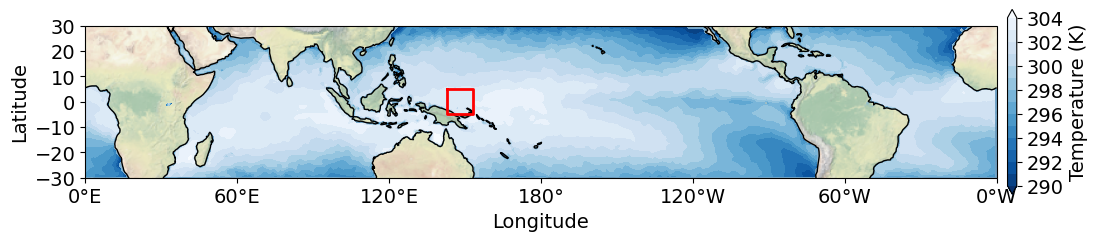

In [2]:
%load_ext autoreload
%autoreload 2
import figure01_studydomain as f1
f1.plot_map()

### Figure 2

This is a plot of the temporal mean of OLR for the global tropics (over the last 30 days of the simulation)

```figure02_olrgt.py``` was adapted from ```global_tropics_mean.ipynb```

Progress for getting mean OLR from files...
ARPr1deg
ICONr1deg
MPASr1deg
SCREAMr1deg
SAMr1deg
IFSr1deg
UMr1deg
GEOSr1deg
SHiELDr1deg
plotting...
the units are W/m$^2$
0 CERES 2020
... defined da...
colorbar min/max 200 300
1 ARPr1deg
... defined da...
colorbar min/max 200 300
... plotting...
... plotted. Adding axis stuff...
...done with 2 of 10
2 GEOSr1deg
... defined da...
colorbar min/max 200 300
... plotting...
... plotted. Adding axis stuff...
...done with 3 of 10
3 ICONr1deg
... defined da...
colorbar min/max 200 300
... plotting...
... plotted. Adding axis stuff...
...done with 4 of 10
4 IFSr1deg
... defined da...
colorbar min/max 200 300
... plotting...
... plotted. Adding axis stuff...
...done with 5 of 10
5 MPASr1deg
... defined da...
colorbar min/max 200 300
... plotting...
... plotted. Adding axis stuff...
...done with 6 of 10
6 SAMr1deg
... defined da...
colorbar min/max 200 300
... plotting...
... plotted. Adding axis stuff...
...done with 7 of 10
7 SCREAMr1deg
... define

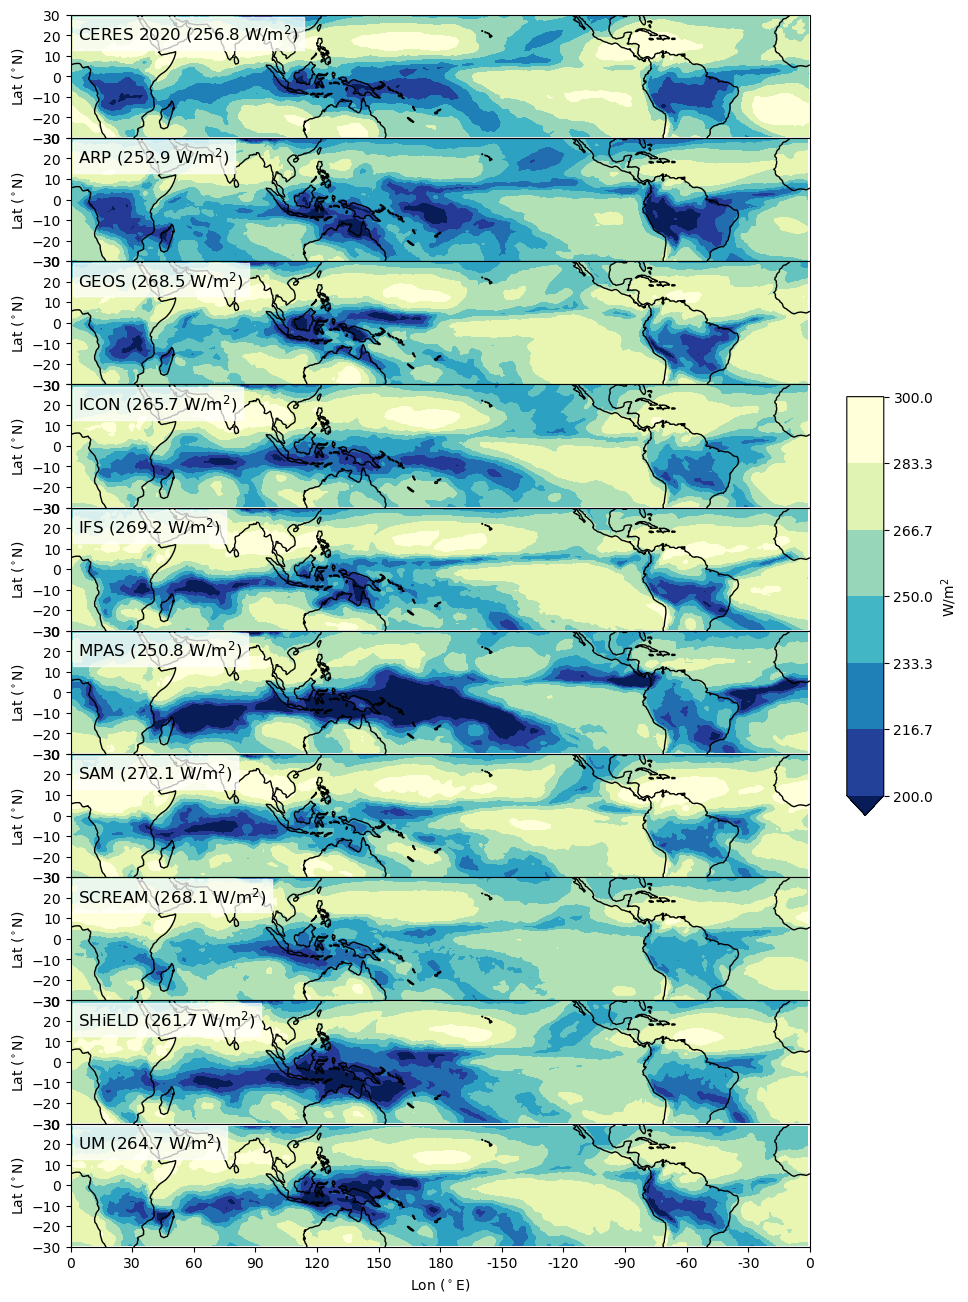

done


In [3]:
import figure02_olrgt as f2
f2.plot_olrgt(diff=False, ceres_file="CERES 2020")

### Figure 3

This generates a side-by-side plot of 

1. mean OLR vs accumulated precip over the last 30 days of the simulation
2. the stratiform to convective precipitation ratio using the definition of stratiform precip being simply less than 1 mm/hr

```figure03_precip.py``` was adapted from ```olrvspr.ipynb``` and ```precip_rate.ipynb```

Preprocessing: None

The data for this plot has been provided in a csv file or is hard-coded for the DYAMOND 2 model output. If you want to use your own model output, you will need to modify the code.

R-squared for OLR v precip: 0.7104
reading the strat to conv ratio DataFrame
0 IMERG
1 ARP
2 GEOS
3 ICON
4 IFS
5 MPAS
6 SAM
7 SCREAM
8 SHiELD
9 UM
saving as ../plots/figure03_precip.pdf


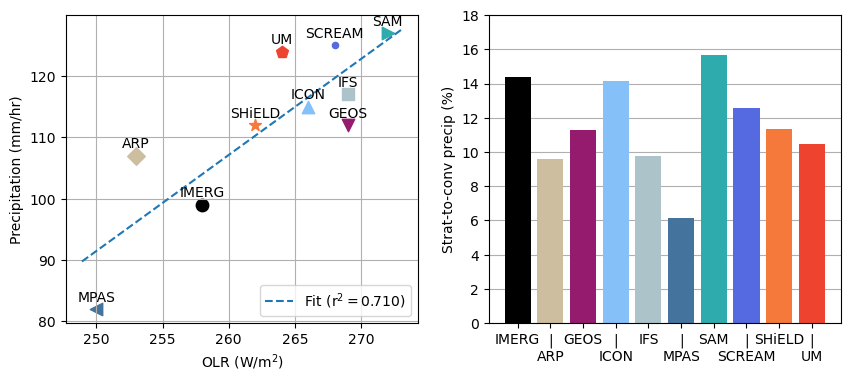

In [4]:
%autoreload 2
import figure03_precip as f3
f3.plot_both()

### Figure 4

This generates a plot of the histogram of ice water path for the models and dardar from the global tropics (30N-30S).

```figure04_iwphist.py``` was adapted from ```Tropical_hist.ipynb```

Preprocessing:

1. run the ```sh_scripts/simple_iwp_hist.sh``` file to generate the iwp histograms from the gt iwp files (they were coarsened to 1 deg before computing the iwp and iwp histograms - we tested doing the same on the native grid and the histograms ended up looking very similar so it wasn't worth the extra computing time and resources).

0 GEOS
1 ICON
2 IFS
3 SAM
4 SCREAM
5 SHiELD
6 UM
models done, do obs
(29,)
obs done
saved as ../plots/figure04_iwphist_gt_norm.pdf


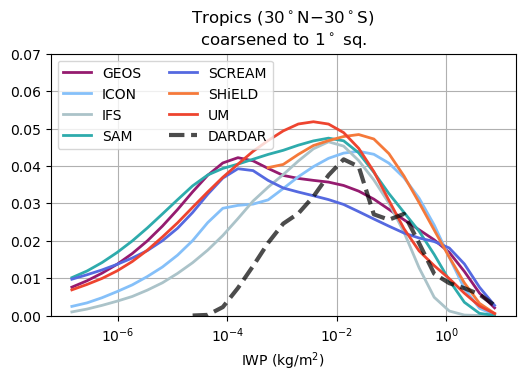

In [8]:
%autoreload 2
import figure04_iwphist as f4
f4.plot_iwphist()

### Figure 5

This generates a plot of thin cirrus cloud fraction (iwp < 0.1 kg/m3) side by side with mean precipitation rate (proxy for deep convection)

```figure05_thincirrusfrac.py``` was adapted from ```global_tropics_mean.ipynb```

Preprocessing:

1. use cdo to subset, calculate the thin cirrus cloud fraction, then save the time mean files for plotting

For the individual files from the native grid (one day at a time)
   ```
   cdo -sellonlatbox,0,360,-30,30 $native_grid_global $native_grid_gt
   cdo -remapcon,r360x180 -timmean -gec,2 -add -gec,1e-4 $native_grid_gt -ltc,1e-1 $native_grid_gt $timmean_thin_ci_frac_coarsened1deg_from_native
   ```
Once you've done each day, concatenate them and take the timmean again
   ```
   cdo -setname,cicldfrac -timmean -cat <all_the_above_files>
   ```

0 ARP
(180, 360) (60, 360)
1 GEOS
(180, 360) (60, 360)
2 ICON
(180, 360) (60, 360)
3 SAM
(180, 360) (60, 360)
4 SCREAM
(180, 360) (60, 360)
5 SHiELD
(180, 360) (60, 360)
6 UM
(180, 360) (60, 360)
saving as ../plots/figure05_thincifrac_pr.pdf


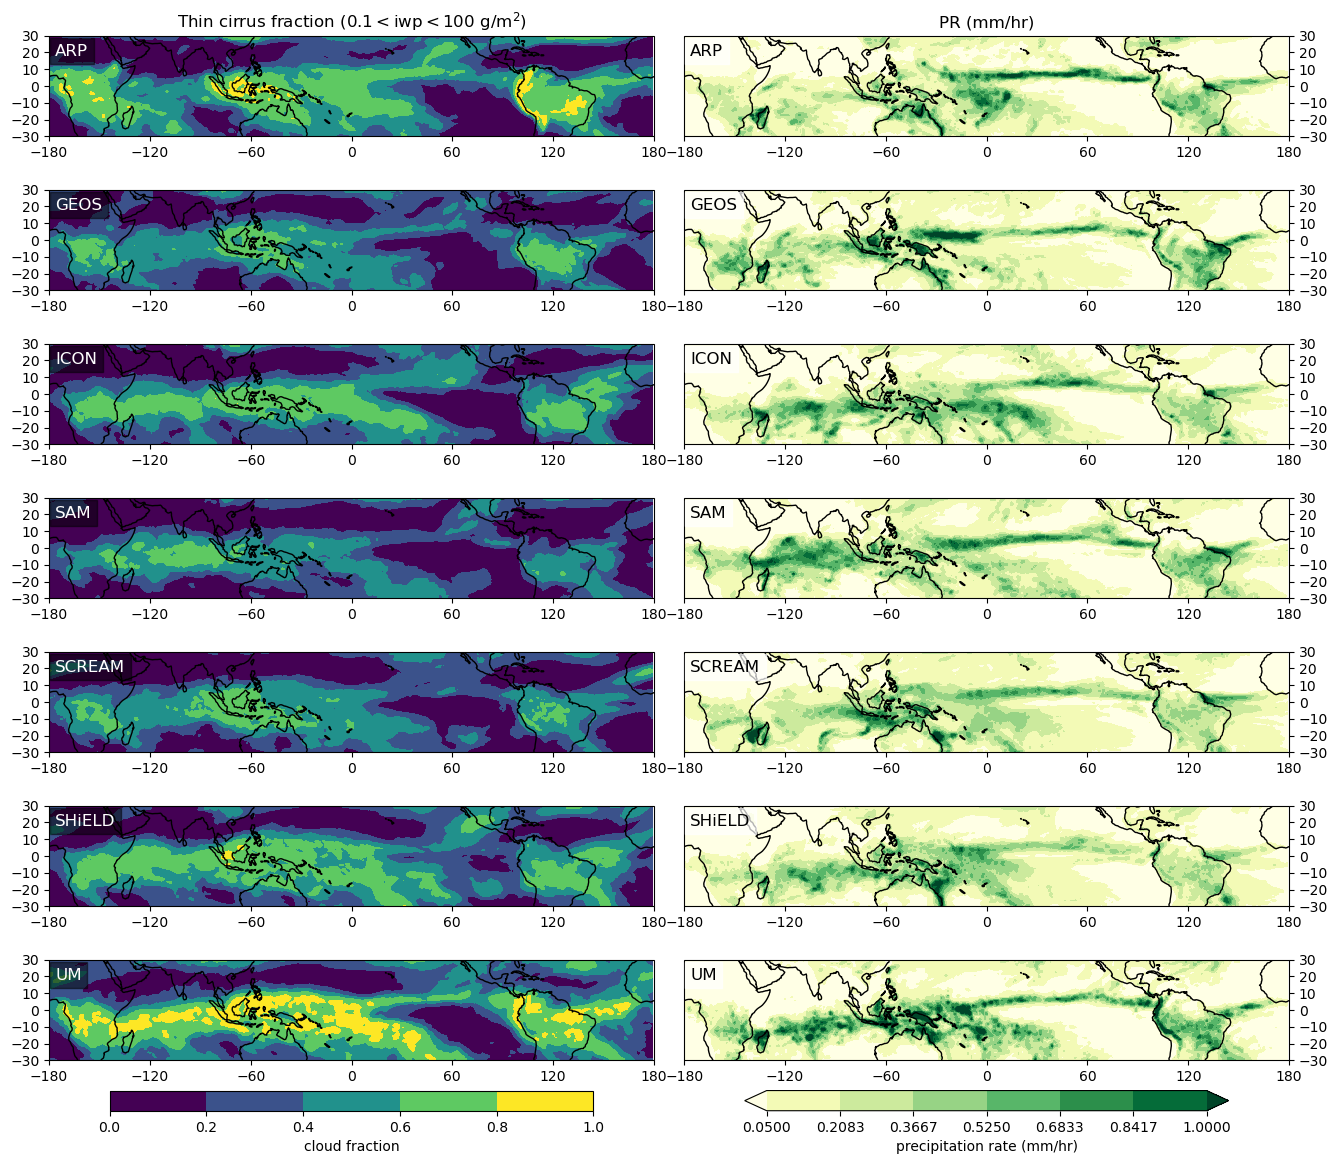

In [7]:

%autoreload 2
import figure05_thincirrusfrac as f5
f5.plot_thincifrac()

### Figure 6

This plots the mean outgoing LW vs SW for both dyamond 1 and 2 models (OLR vs Reflected SW)

```figure06_olrvrsw.py``` was adapted from ```spatiotemporal_mean.ipynb```

Preprocessing:

1. The spatiotemporal mean was saved in a file for OLR and Reflected SW for dyamond 1 and 2 saved in separate files. The model names are the variables and the values are the mean for OLR or reflected SW.



saving as ../plots/figure06_olrvsrsw.pdf


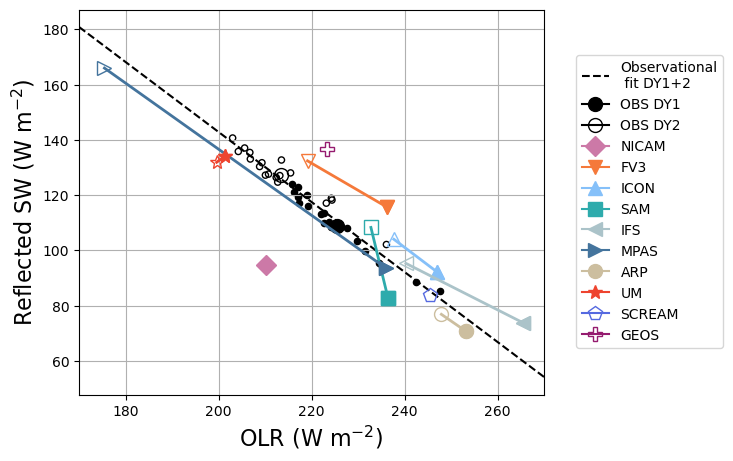

In [9]:
%autoreload 2
import figure06_olrvrsw as f6
f6.plot_olrvsswu()

### Figure 7

This plots the joint albedo-OLR histogram for the TWP using CCCM observations for the DY1 (JAS) and DY2 (JFM) seasons. Then plots the difference between the two. This plot is a set up for the next figure which incorporates the model output.

```figure07_jhist_cccm.py``` was adapted from ```joint_hist.ipynb```

Preprocessing: None. Just need the observational files that have LW and SW outgoing radiation at TOA from CCCM. 

0 JFM
7562
1 JAS
7289
difference
7562
7289
saving as ../plots/figure07_jhist_cccm.pdf


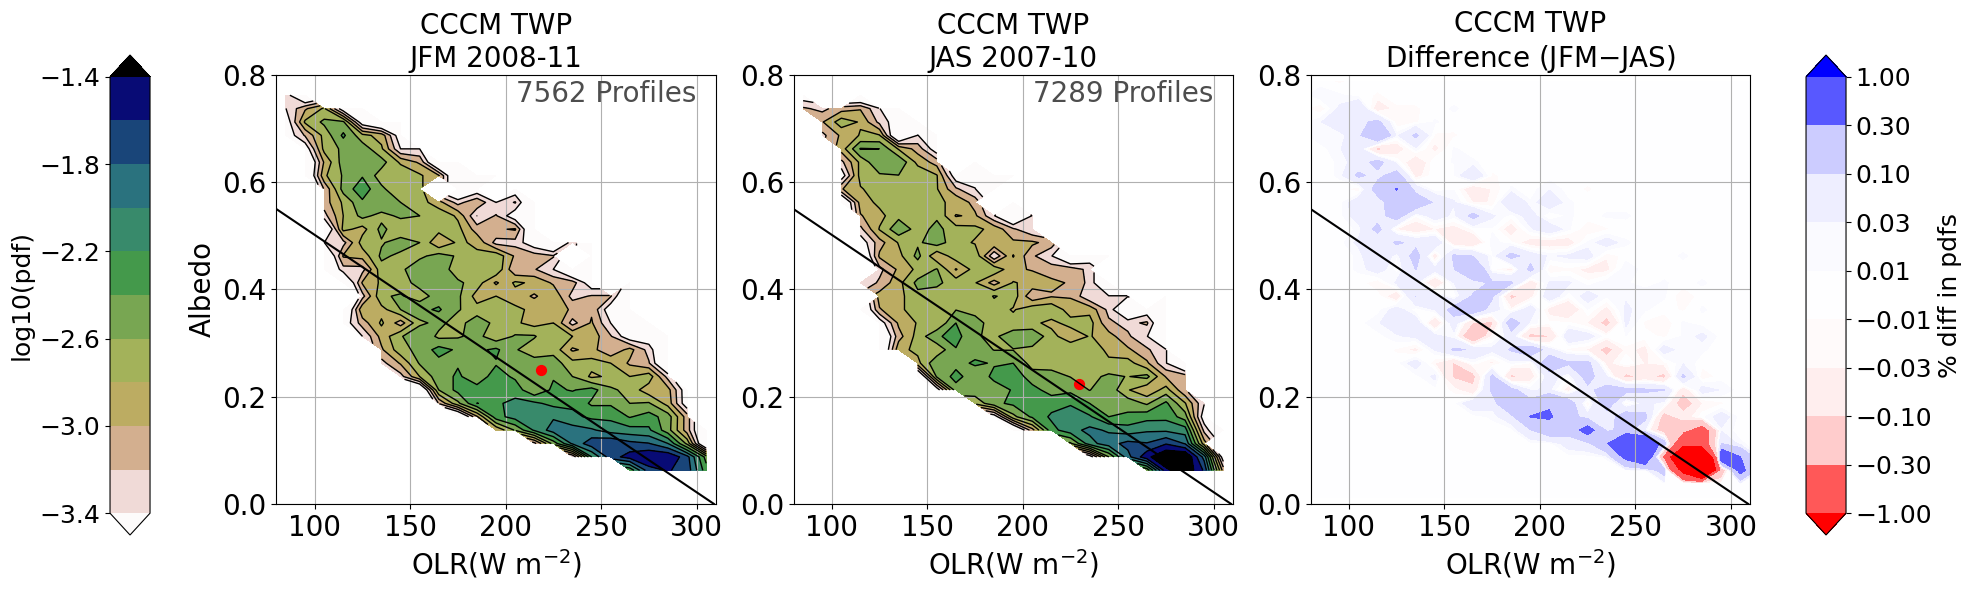

In [10]:
%autoreload 2
import figure07_jhist_cccm as f7
f7.plot_jhist_cccm()

We've also included a plot of the joint albedo-OLR histogram as a bonus plot!

In [ ]:
# f7.plot_jhist_schematic()

### Figure 8

This is similar to figure 7 in that it plots the joint albedo-OLR histograms for the models. It plots the differnece between seasons (DYAMOND 2 - DYAMOND 1) in the blue to red colors. The blue colors signify those albedo-OLR values are more prevalent in DYAMOND 2 (boreal winter). The black contours outline the DYAMOND 2 winter joint albedo-OLR histogram (absolute values, not the difference) so that you can see the different characteristics of the different models, not just the seasonal shift. 

For this plot, you just need the OLR and SW radiation files for each model - the histogram is computed inside the plot function.

```figure08_jhist_all.py``` was adapted from ```joint_hist.ipynb```


CCCM TWP...False
	olr (15352,), alb (15352,)

...starting to plot...	(7562,)
7562
... done plotting CCCM .
ARP TWP...False
	olr (2880, 100, 101), alb (2880, 100, 101)

...starting to plot...	(653400,)
653400
... done plotting ARP .
ICON TWP...False
	olr (2820, 100, 101), alb (2820, 100, 101)

...starting to plot...	(522720,)
522720
... done plotting ICON .
IFS TWP...False
	olr (720, 100, 101), alb (720, 100, 101)

...starting to plot...	(163350,)
163350
... done plotting IFS .
MPAS TWP...False
	olr (2880, 100, 101), alb (2880, 100, 101)

...starting to plot...	(653400,)
653400
... done plotting MPAS .
SAM TWP...False
	olr (2879, 100, 101), alb (2879, 100, 101)

...starting to plot...	(652311,)
652311
... done plotting SAM .
SHiELD TWP...False
	olr (2880, 100, 101), alb (2880, 100, 101)

...starting to plot...	(653400,)
653400
... done plotting SHiELD .
UM TWP...False
	olr (720, 107, 142), alb (720, 107, 142)

...starting to plot...	(246750,)
246750
... done plotting UM .
... saved as .

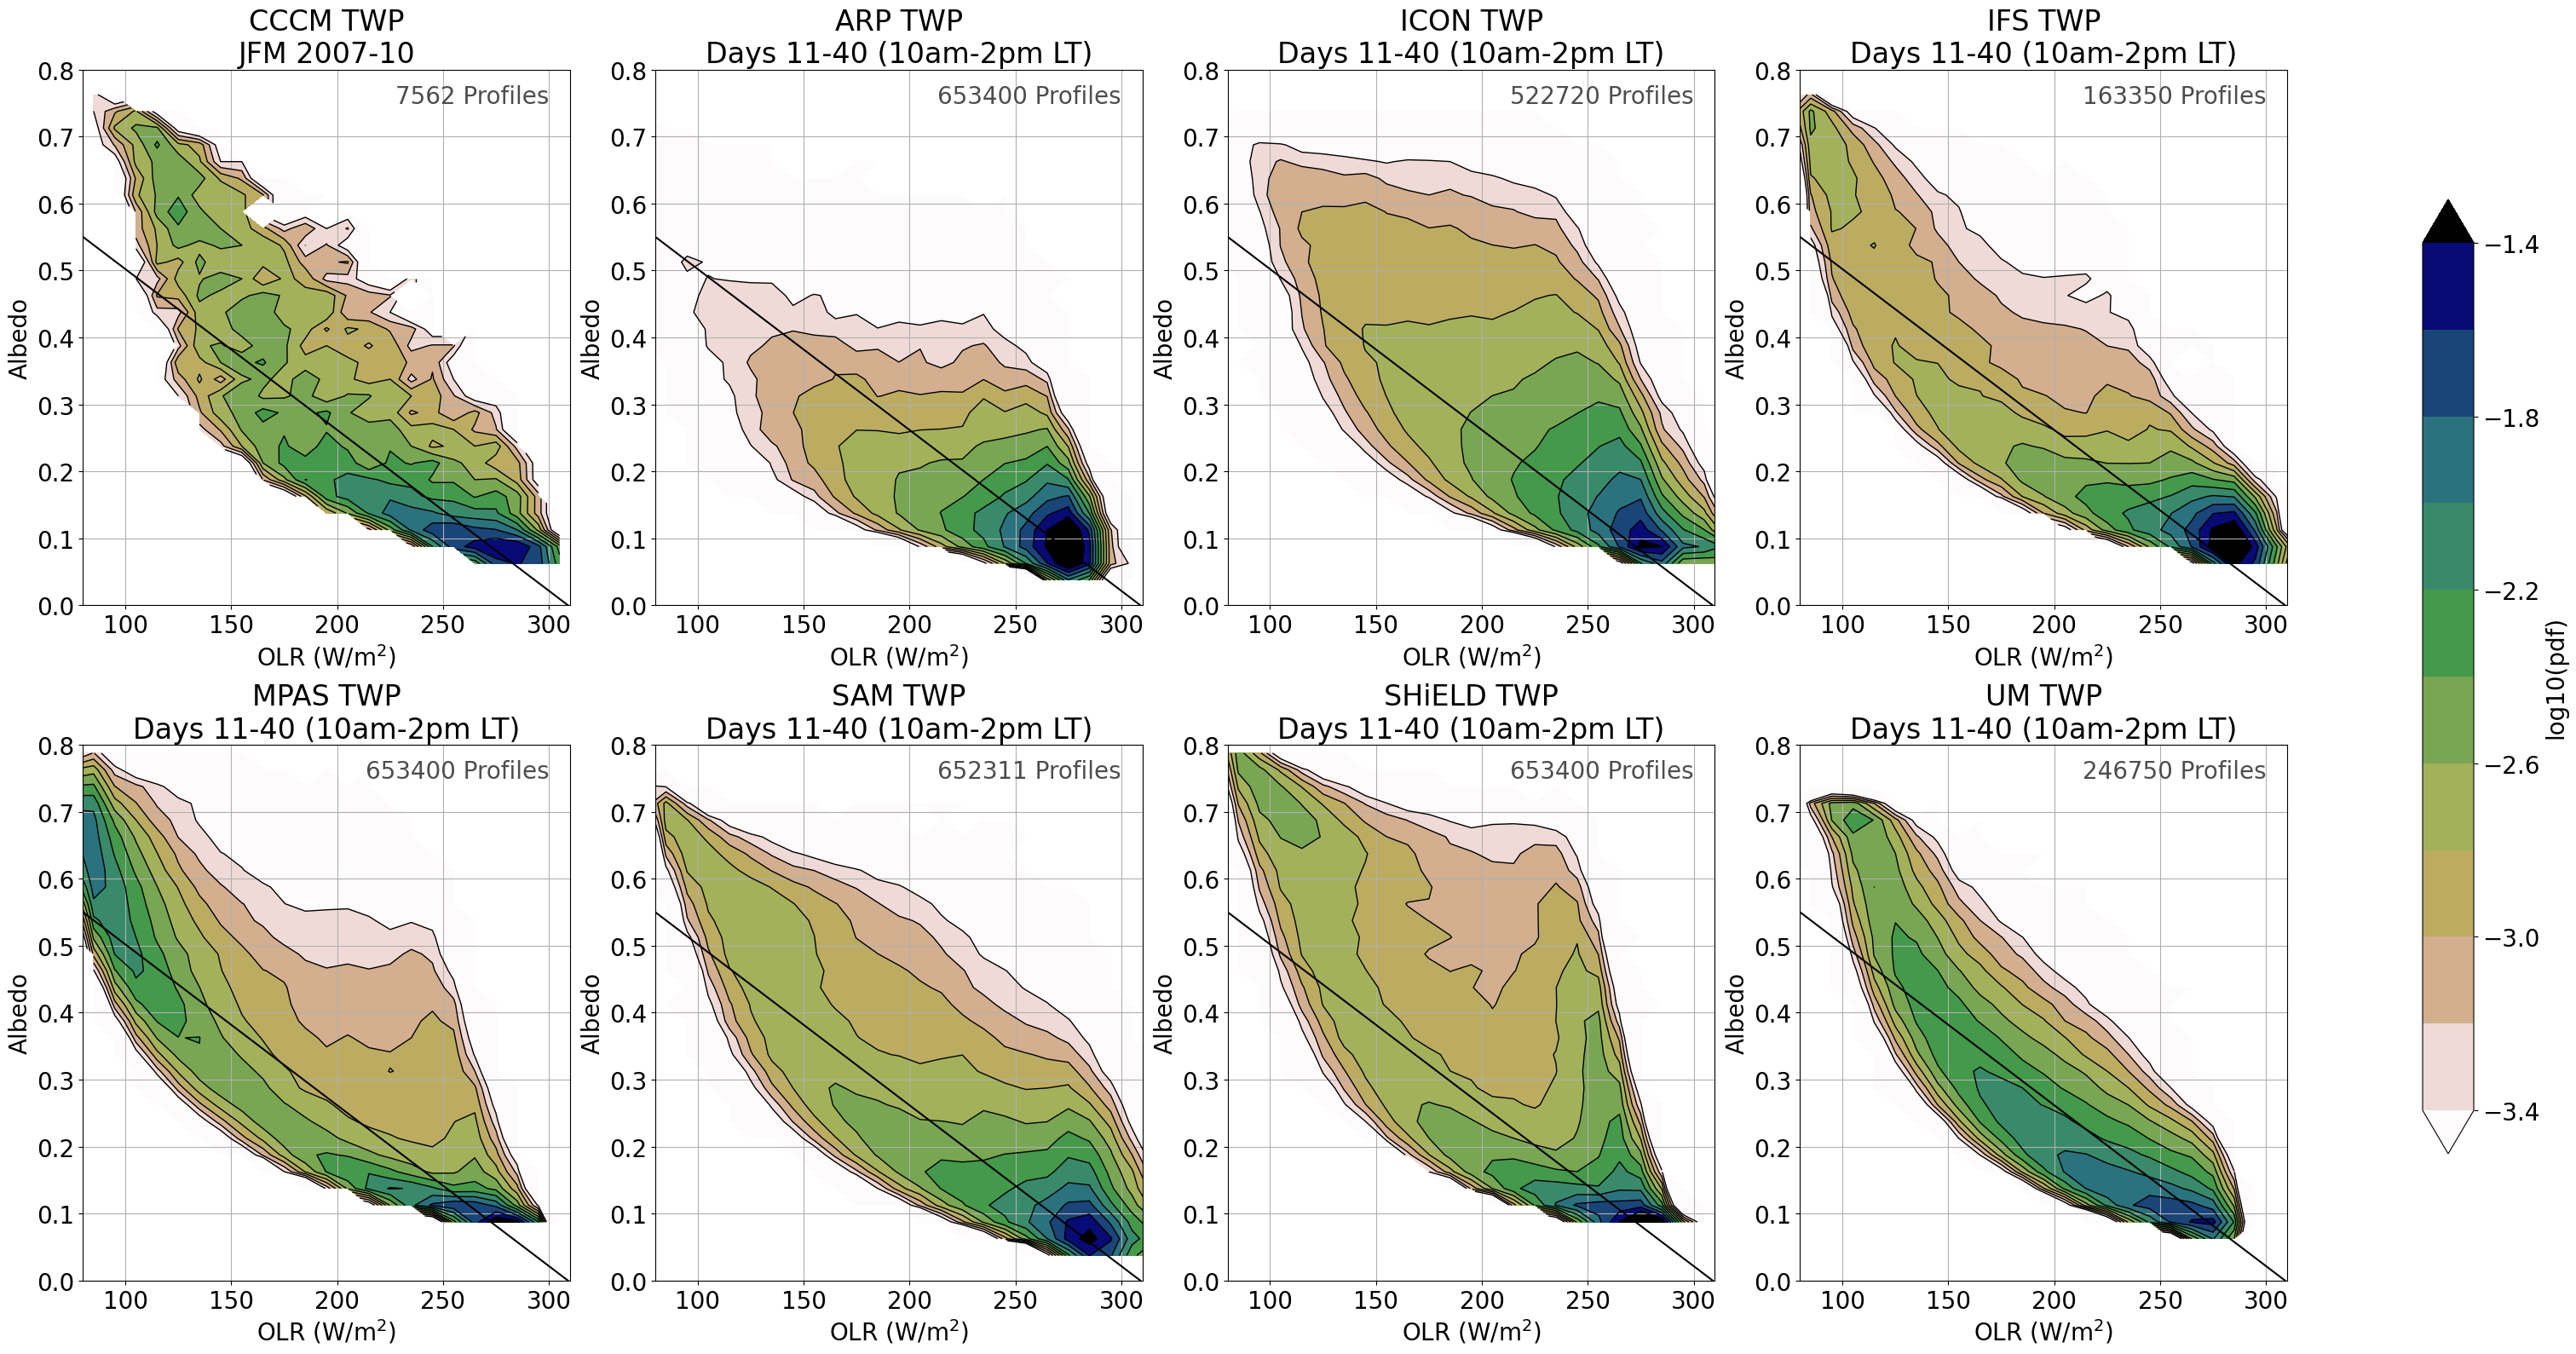

In [3]:
%autoreload 2
import figure08_jhist_all as f8
f8.plot_jhist_all('density')

### Figure 9

This is a plot of the cloud fraction (iwc > 5e-7 kg/m3) and total cloud condensate (kg/m3).
The total cloud condensate is liq + ice + snow + graupel (if available).

```figure09_cldprofiles.py``` was adapted from ```twp_analysis.ipynb```

Preprocessing:

1. calculate the total liquid + frozen water content from mixing ratios
2. calculate the horizontal (fldmean) mean of the total water content
3. calculate the cloud fraction from the total water content (```(np.mean(np.where(watercontent > 5e-7 kg/m3, 1, 0), dim=['time'])```)

We use these for our file input to plot the figure below

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
FV3 DY1...shapes of iwc, cldfrac, and z: (79,) (79,) (79,)
SHiELD DY2...shapes of iwc, cldfrac, and z: (79,) (79,) (79,)
SAM DY1...shapes of iwc, cldfrac, and z: (74,) (74,) (74,)
SAM DY2...shapes of iwc, cldfrac, and z: (61,) (61,) (61,)
ARP...ARP DY2...shapes of iwc, cldfrac, and z: (59,) (59,) (59,)
ICON...ICON DY2...shapes of iwc, cldfrac, and z: (76,) (76,) (76,)
GEOS...GEOS DY2...shapes of iwc, cldfrac, and z: (181,) (181,) (181,)
SCREAM...SCREAM DY2...shapes of iwc, cldfrac, and z: (127,) (127,) (127,)
UM...UM DY2...shapes of iwc, cldfrac, and z: (54,) (54,) (54,)
CCCM_DY1 - JAS 2007-2010... shapes of iwc, cldfrac, and z: (92,) (92,) (92,)
DARDAR_DY1 - JAS 2009... shapes of iwc, cl, and z: (436,) (436,) (436,)
DARDAR_DY2 - Feb 2007-2017... shapes of iwc_low, iwc_hgh, cldfrac, and z: (334,) (334,) (9, 334) (334,)
DARDAR_DY2 - Feb mean 2007-2017... shapes of iwc, cl, and z (334,) (9, 334) (334,

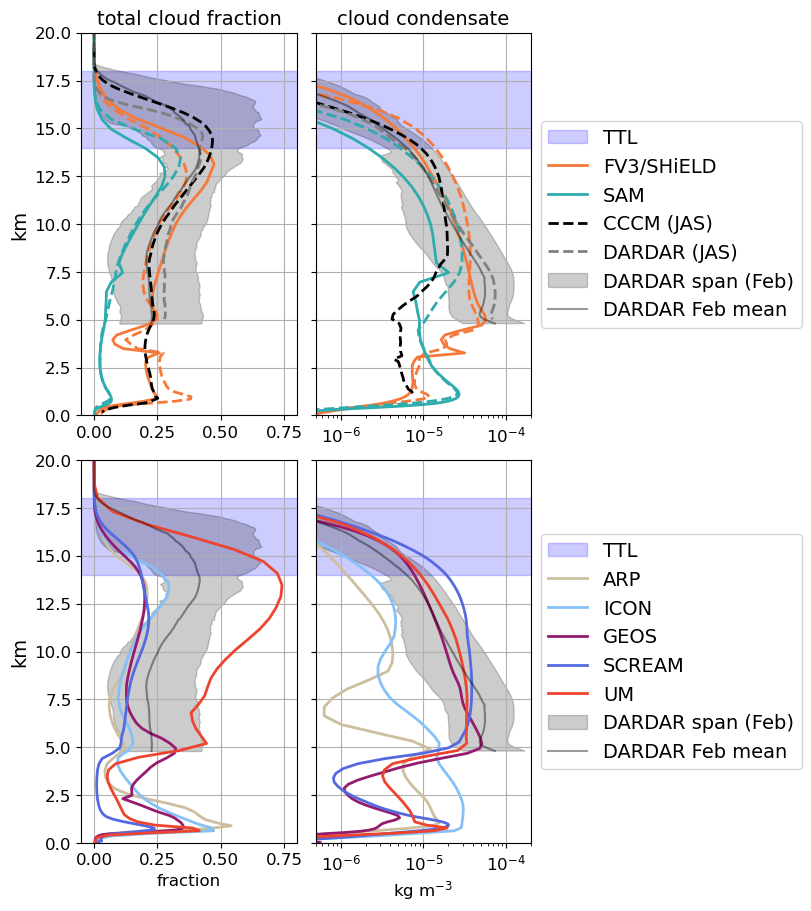

In [5]:
%load_ext autoreload
%autoreload 2
import figure09_cldprofiles as f9
f9.plot_cldprofiles()

### Figure 10

This one takes a while to run...
Plots generated:

1. mean temperature profile over the lat 5 days, 
2. the temperature drift from the first (after spin up days 10-15) to last 5 days (days 35-40),
3. the relative humidity wrt ice,
4. the cloud top height distribution using a cld threshold of iwc 1e-7 kg/m3 over the last 5 days...

```figure10_ttlverticalprofiles.ipynb``` was adapted from ```vert_profiles.ipynb```

Preprocessing:
1. Generate the cloud top height file using the cldtop.ipynb file

   


ARP 1 of 7...getting temp...calculating rhi...getting z...shape of t, rhi, and z (39, 59, 202950) (59,) (59,)...... plotting tmean, tdrift, rhi, calculating cth hist...count of cth > 12: 4796877...plotting cth
GEOS 2 of 7...getting temp...calculating rhi...getting z...shape of t, rhi, and z (39, 180, 97152) (180,) (180,)...... plotting tmean, tdrift, rhi, calculating cth hist...count of cth > 12: 872000...plotting cth
ICON 3 of 7...getting temp...calculating rhi...getting z...shape of t, rhi, and z (39, 76, 195442) (76,) (76,)...... plotting tmean, tdrift, rhi, calculating cth hist...count of cth > 12: 5429625...plotting cth
SAM 4 of 7...getting temp...calculating rhi...getting z...[ 0.0612      0.104872    0.15116431  0.20023416  0.25224826  0.30738315
  0.3658261   0.42777562  0.4934422   0.5630488   0.6368317   0.71504164
  0.79794407  0.8858208   0.97896993  1.078246    1.1860706   1.3046775
  1.4351455   1.5786599   1.736526    1.9101789   2.1012256   2.316409
  2.5638702   2.8484

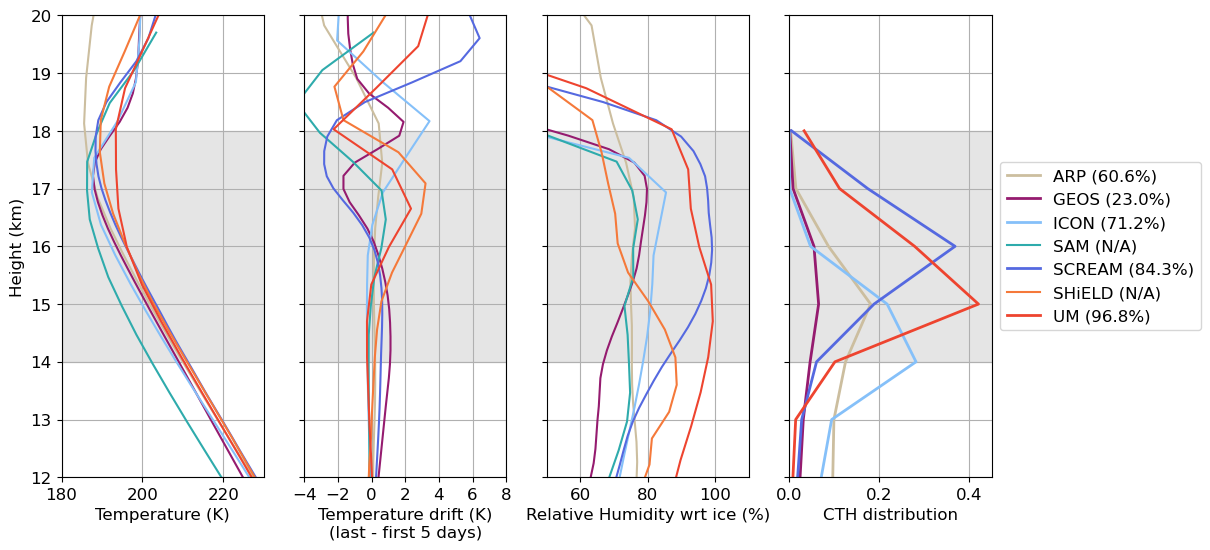

In [11]:
import figure10_ttlverticalprofiles as f10
f10.plot_utlsprofiles(["ARP","GEOS","ICON","SAM","SCREAM","SHiELD","UM"])

In [ ]:
print("test")

### Figure 11

Also takes a while to run...

This plots the joint cloud top height and OLR histogram with CTH distribution on the far right plot. 
Each row shows a different CTH cloud threshold (high to low from top to bottom). THus, as we move down, we see the emergence of more TTL cirrus in the upper right.
You can change the coarseness of the CTH distributions on the far right by changing the zbins parameter in the function. This plot uses native grid data, not coarsened like the joint albedo-OLR plots.

```figure11_cldtophist.py``` was adapted from ```cldtop.ipynb```

Preprocessing: 

1. generate the cloud top height files using ```cldtop.ipynb``` for the three cloud thresholds (1e-7, 1e-6, and 1e-5 kg/m$^3$)
2. make sure you have the olr files (ARP was saved weirdly so you have to divide by -900 in the figure script).



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 ARP...shapes of ds and olr match: (232, 202950)...plotting the 2d histograms...47084400
47084400
47084400
plotting the cth distributions...
cf count: 32076851 4708440000
1 GEOS...shapes of ds and olr match: (240, 97152)...plotting the 2d histograms...23316480
23316480
23316480
plotting the cth distributions...
cf count: 8151896 2331648000
2 ICON...shapes of ds and olr match: (210, 195442)...plotting the 2d histograms...41042820
41042820
41042820
plotting the cth distributions...
cf count: 30441001 4104282000
3 SCREAM...shapes of ds and olr match: (240, 61250)...plotting the 2d histograms...14700000
14700000
14700000
plotting the cth distributions...
cf count: 10108898 1470000000
15352
saved as ../plots/figure11_ccldtopiwc_vs_olr_ARGEICSC_CCCM.pdf


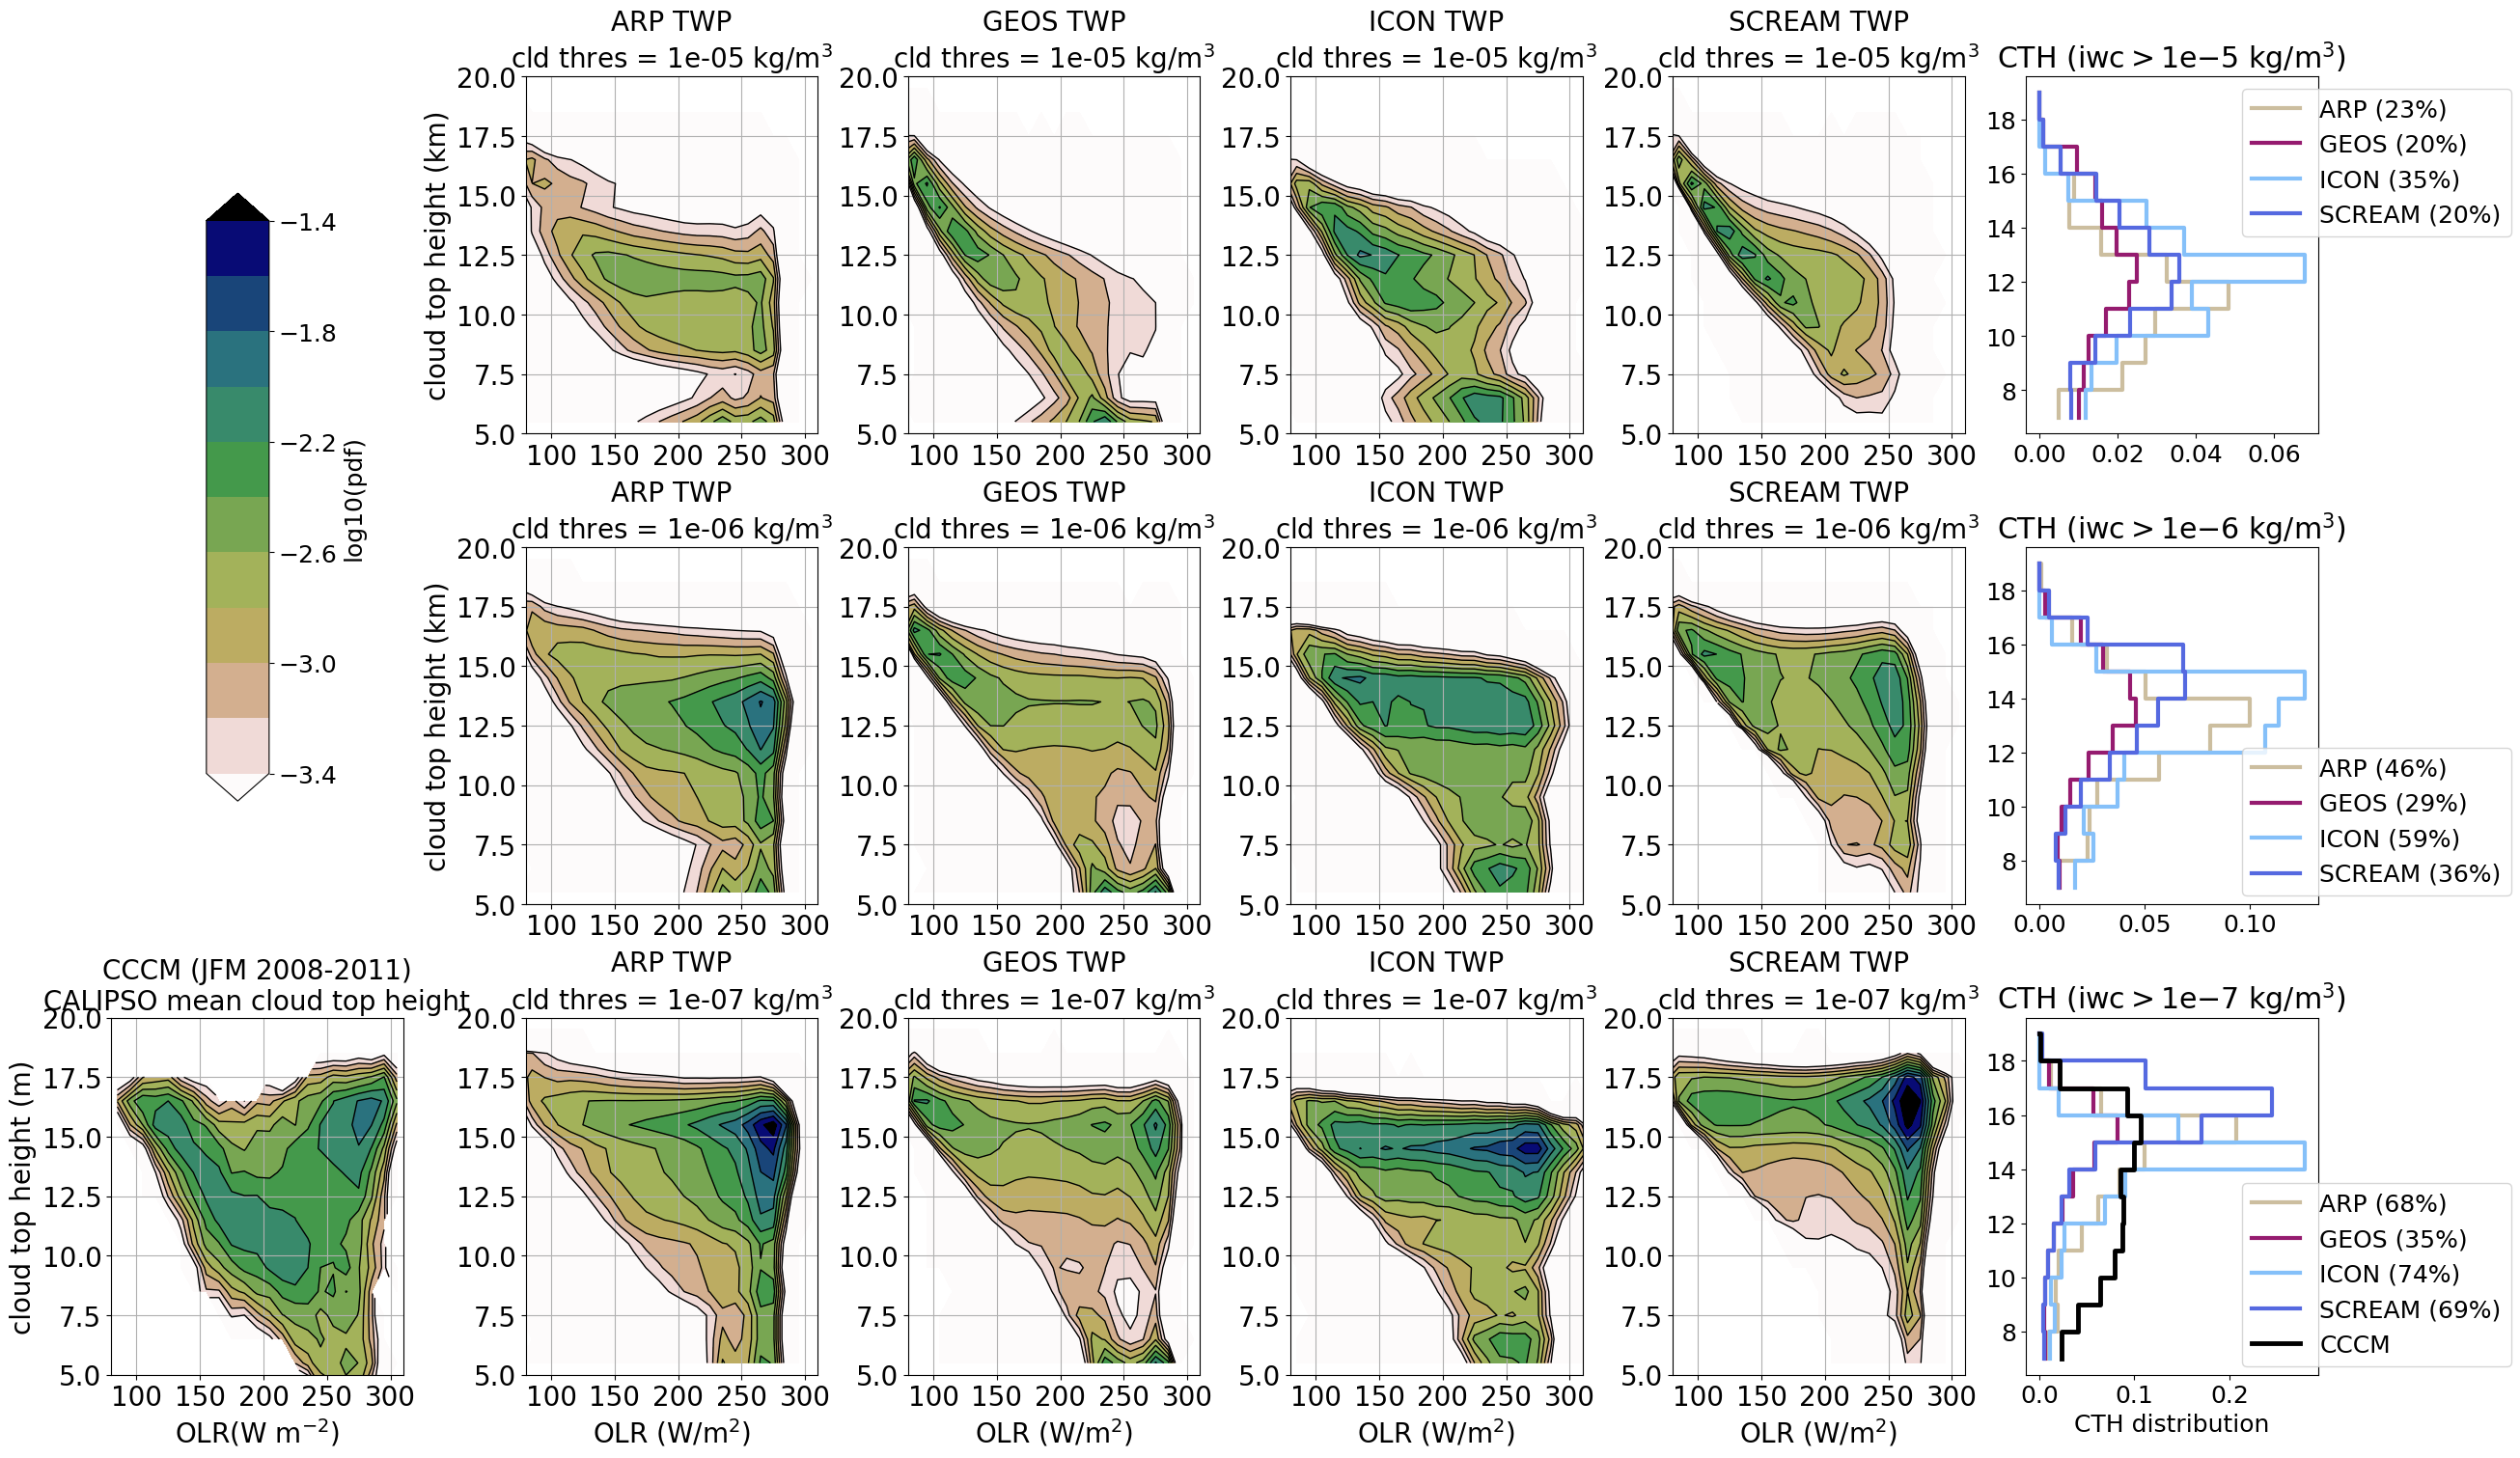

In [6]:
%load_ext autoreload
%autoreload 2
import figure11_cldtophist as f11
f11.plot_cldtophist()